# Exploratory Data Analysis of India's Weather And Its Impact On Renewable Energy

![](https://i.imgur.com/ZWsOlKf.jpg)
**Motivation Behind Choosing Weather Data**

Weather Monitoring Station (WMS) is one of the most crucial instruments installed in Solar PV Power plants. A weather monitoring station can be immensely helpful in monitoring the efficiency and performance of any solar power plant. The data from the WMS can be used to get many insights about the plant operation and possible avenues to increase the plant output.

 The key factor affecting the PV system's performance is the solar radiation data. But along with solar radiation data, the weather parameters like ambient temperature, relative humidity, wind speed, wind direction, atmospheric pressure, and rain are the other important factors affecting the performance. 
Weather data and weather prediction can help in scheduling maintenance and repairs. Doing maintenance and repairs at the wrong time could prove to be a costly affair.

Wind velocity is important from the plant safety perspective. The heavy wind loads at a site may cause damage to the PV modules. With accurate wind speed and direction data, a user can take the necessary steps to prevent damages and loss. While wind speed largely determines the amount of electricity generated by a wind turbine. Higher wind speeds generate more power because stronger winds allow the blades to rotate faster. Faster rotation translates to more mechanical power and more electrical power from the generator. 
So it is of utmost importance to analyze the weather data and get to know the climate facts in different states and cities for the installation, and maintenance of power plants.

**What is Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

In this project, I have selected an Indian weather dataset from kaggle to explore and analyze the sites which are more efficient for solar as well as wind power installations. We'll use the the python libraries [pandas](https://pandas.pydata.org/docs/),  [matplotlib](https://matplotlib.org/stable/users/index.html), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/getting-started/) and [folium](https://www.geeksforgeeks.org/python-plotting-google-map-using-folium-package/) to do exploratory data analysis on the weather dataset. 

Here's the outline of the steps we'll follow:
1. Downloading a dataset from an online source
2. Data preparation and cleaning with Pandas
3. Open-ended exploratory analysis and visualization
4. Asking and answering interesting questions
5. Summarizing inferences and drawing conclusions

By the end of the project we'll get an idea on Indian weather and also have some preferable sites for solar as well as wind power installations.



## How to run the code
The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Binder. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on Google Colab or Kaggle to use these platforms. You can make changes and save your own version of the notebook to Jovian by executing the following cells.

Since the selected dataset contains 5+ million rows of data, I have selected "Gogle Colab" to execute the code for faster response.

When you are commiting the notebook to Jovian for the first time in "Colab" it will ask for API key which will be found in your Jovian account getstarted section.

In [ ]:
!pip install jovian --upgrade --quiet

In [265]:
import jovian

In [266]:
# Execute this to save new versions of the notebook
jovian.commit(project="final-eda-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

## Installing the required packages
In this project, we'll use data analysis tools like Numpy, Pandas and visulization tools like matplotlib, seaborn, plotly and folium.

let's install the required libraries and import them.

In [ ]:
# installing the required packages
!pip install pyyaml==5.4.1 pandas matplotlib==3.1.3 numpy seaborn plotly folium opendatasets wordcloud --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Import the required libraries
# used to download a dataset from kaggle
import opendatasets as od
# Data analysis library in python
import pandas as pd
# numerical computing library
import numpy as np
#  for creating static visualizations in Python
import matplotlib
import matplotlib.pyplot as plt
# a high-level interface for drawing informative statistical graphics.
import seaborn as sns
#for creating interactive visualizations
import plotly.express as px
#Plotting geospatial data with Folium
import folium
# to create wordcloud in python
import wordcloud
 # it turns on “inline plotting”, where plot graphics will appear in your notebook
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Let's begin EDA:

## Downloading a dataset from an online source
In this article, I have selected India's weather data from Kaggle datasets. This dataset contains 5.63 million data about India's weather from 365 Cities and 26 States. The data is collected from 29th Jan 2020 to 20th Feb 2021. You can find the dataset here [https://www.kaggle.com/syedjaferk/indias-weather-data](https://www.kaggle.com/syedjaferk/indias-weather-data)

We'll use the opendatasets library to download the dataset from Kaggle datasets. We have already installed and imported opendatasets library as `od`  in the above section of installing required libraries.

In [ ]:
#assign dataset url to a variable
dataset_url='https://www.kaggle.com/syedjaferk/indias-weather-data/download'

We'll download the dataset using `od.download`. While downloading the dataset from kaggle it will ask for kaggle username and key and these will be found in your kaggle account API section.

In [ ]:
#download the dataset using opendatasets from Kaggle
od.download(dataset_url)

Skipping, found downloaded files in "./indias-weather-data" (use force=True to force download)


The dataset is downloaded into the directory 'indias-weather-data'. Let's verify this and retrieve the list of files in the dataset.

The `os` module in Python provides many functions for interacting with the OS and the filesystem. Let's import it and use.

In [ ]:
# import os module
import os

In [ ]:
# listdir in os shows the list of files in the given directory
os.listdir('indias-weather-data')

['weather_data.csv']

You can also go through the downloaded files using the "File" option left side in Colab. It seems like the dataset contains only one csv file:

* 'weather_data.csv': The weather information is in csv format.

Let's load the CSV file using the Pandas library. We'll use the name `weather_raw_df` for the dataframe to indicate the data is unprocessed that we might clean, filter, and modify to prepare a dataframe ready for analysis.


In [ ]:
!pip install -U pandas-profiling

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [191]:
# load the dataset and display the dataframe
weather_raw_df=pd.read_csv('/content/indias-weather-data/weather_data.csv')
weather_raw_df

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.00,76.9600,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.00,76.9600,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.00,76.9600,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.00,76.9600,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.00,76.9600,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634117,5738569,Badaun,1275163,28.05,79.1167,2021-02-20 02:30:00+05:30,16.14,16.14,16.14,1015,1015,995,33,Clear,clear sky,0,2.31,285,North\n,Uttar Pradesh
5634118,5738570,Badaun,1275163,28.05,79.1167,2021-02-20 05:30:00+05:30,14.09,14.09,14.09,1015,1015,995,36,Clear,clear sky,0,1.53,302,North\n,Uttar Pradesh
5634119,5738571,Badaun,1275163,28.05,79.1167,2021-02-20 08:30:00+05:30,17.24,17.24,17.24,1017,1017,997,35,Clear,clear sky,0,2.13,241,North\n,Uttar Pradesh
5634120,5738572,Badaun,1275163,28.05,79.1167,2021-02-20 11:30:00+05:30,25.40,25.40,25.40,1018,1018,998,23,Clear,clear sky,0,2.89,271,North\n,Uttar Pradesh


The dataset contains over 5634122 rows and 20 columns. The data is collected from 29th Jan 2020 to 20th Feb 2021. The weather information is collected 8 times per day with 3 hours gap in each possible Indian city.

In [193]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

## Data preparation and cleaning with Pandas
The quality of data is the most crucial element of any business intelligence strategy. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.


Let's view the dataset columns.

In [194]:
# viewing the dataset columns
weather_raw_df.columns

Index(['id', 'city_name', 'city_id', 'latitude', 'longitude', 'dt_txt', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'main', 'description', 'clouds', 'wind_speed',
       'wind_degree', 'region', 'state'],
      dtype='object')

Since the dataset contains 5.63 million rows, let's filter some required columns for our analysis to get a quick response.

In [195]:
# selecting the required columns
selected_columns=['city_name','latitude','longitude','dt_txt','temp','pressure','grnd_level','humidity','main','description','clouds','wind_speed','wind_degree','region','state']

The preesure is given in hPa, temperature is in degree celcius, humidity is in %, clouds is in % and wind speed is in meter/sec, wind degree in degress.

Let's extract a copy of the data from these columns into a new data frame weather_df. We can continue to modify further without affecting the original data frame.

In [196]:
# deep copying the original dataframe into a new variable
weather_df=weather_raw_df[selected_columns].copy()

Let's view some basic information about the data.

In [197]:
# to see the size of a dataset
weather_df.shape

(5634122, 15)

In [198]:
# to view the basic information of dataset
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634122 entries, 0 to 5634121
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   city_name    object 
 1   latitude     float64
 2   longitude    float64
 3   dt_txt       object 
 4   temp         float64
 5   pressure     int64  
 6   grnd_level   int64  
 7   humidity     int64  
 8   main         object 
 9   description  object 
 10  clouds       int64  
 11  wind_speed   float64
 12  wind_degree  int64  
 13  region       object 
 14  state        object 
dtypes: float64(4), int64(5), object(6)
memory usage: 644.8+ MB


The filtered dataset contains 4 floats, 5 ints and 6 object type columns. It seems like the dataset doesn't have any null values. It has one date column and two categorical data columns (i.e main and description).  

We'll convert the object type date column into datetime type using `pd.to_datetime`.

In [199]:
# converting the object type date column into datetime
weather_df.dt_txt=pd.to_datetime(weather_df.dt_txt)
weather_df.dt_txt[0]

Timestamp('2020-01-29 08:30:00+0530', tz='pytz.FixedOffset(330)')

Let's extract time from date column to select particular time rows as per our requirement.

In [200]:
weather_df['time']=weather_df.dt_txt.dt.time
weather_df.time

0          08:30:00
1          11:30:00
2          14:30:00
3          17:30:00
4          20:30:00
             ...   
5634117    02:30:00
5634118    05:30:00
5634119    08:30:00
5634120    11:30:00
5634121    14:30:00
Name: time, Length: 5634122, dtype: object

Let's use pandas describe method to get statistical calculations of numerical columns.

In [201]:
# to view the statistical values of numerical columns
weather_df.describe()

,latitude,longitude,temp,pressure,grnd_level,humidity,clouds,wind_speed,wind_degree
count,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06,5.634122e+06
mean,2.288693e+01,7.888581e+01,2.591592e+01,1.008137e+03,9.708137e+02,5.177615e+01,4.134311e+01,3.073992e+00,1.882795e+02
std,6.221208e+00,8.939075e+00,7.414541e+00,6.246186e+00,3.697419e+01,2.493578e+01,4.092916e+01,1.899257e+00,1.037190e+02
min,-8.591200e+00,5.950000e-02,-1.203000e+01,9.530000e+02,7.270000e+02,2.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00
25%,1.972000e+01,7.572000e+01,2.136000e+01,1.004000e+03,9.600000e+02,3.000000e+01,0.000000e+00,1.650000e+00,9.200000e+01
50%,2.383000e+01,7.773330e+01,2.630000e+01,1.009000e+03,9.790000e+02,5.100000e+01,2.900000e+01,2.700000e+00,2.070000e+02
75%,2.715000e+01,8.130000e+01,3.052000e+01,1.013000e+03,9.940000e+02,7.300000e+01,8.800000e+01,4.130000e+00,2.770000e+02
max,5.153000e+01,1.206710e+02,5.071000e+01,1.037000e+03,1.034000e+03,1.020000e+02,1.150000e+02,3.341000e+01,3.600000e+02


India is a vast country, lying entirely in the Northern hemisphere. The country's land extends between latitudes 8.0667 N to 37.01 N and longitudes 68.11667 E to 97.41667 E. But in the above table, the min and max values of latitude and longitude are out of range. Since the dataset is very large we don't use these latitude and longitude values. Let's keep these values as it is. The temperature, pressure, humidity, wind speed, and wind degree values seem to be within the range.

In [202]:
#weather_df.drop(weather_df[weather_df.latitude<=8.0667].index,axis=0,inplace=True)
#weather_df.drop(weather_df[weather_df.latitude>=37.01].index,axis=0,inplace=True)
#weather_df.drop(weather_df[weather_df.longitude<=68.11667].index,axis=0,inplace=True)
#weather_df.drop(weather_df[weather_df.longitude>=97.41667].index,axis=0,inplace=True)

Let's extract year and month from the date column and add them to the dataframe.

In [203]:
# adding new columns to the dataframe
weather_df['year']=pd.DatetimeIndex(weather_df['dt_txt']).year
weather_df['month']=pd.DatetimeIndex(weather_df['dt_txt']).month


We have done pretty much in data cleaning section and let's move to the next section i.e Open-ended exploratory analysis and visualization.

In [204]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

## Open-ended exploratory analysis and visualization
The data analysis helps us to understand the situation deeply, by digging into the data, so that we can find the "gold" in the data "mine" and tell the hidden stories. Meanwhile, data visualization empowers us to communicate stories more effectively.

Let's set the chart style, font size, figure size and figure facecolour using matplotlib. These are reflected only to matplot and seaborn charts.

In [206]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### State
This column gives the state names from where weather data is collected.

Let's look at the number of states present in the dataset.

In [207]:
weather_df.state.nunique()

26

Currently India has 28 states and 8 union territories. But the dataset has combinedly 26. This means that the dataset has missing states and union territories. Let's find the missing states and union territories.
 

In [208]:
weather_df.state.unique()

array(['Maharashtra', 'Uttar Pradesh', 'Rajasthan', 'West Bengal',
       'Chattisgarh', 'Andhra Pradesh', 'Odisha', 'Haryana', 'Karnataka',
       'Assam', 'Himachal Pradesh', 'Madhya Pradesh', 'Punjab',
       'Telangana', 'Jammu and Kashmir', 'Kerala', 'Tripura',
       'NCT of Delhi', 'Tamil Nadu', 'Nagaland', 'Uttrakhand', 'Gujarat',
       'Manipur', 'Jharkhand', 'Pondicherry', 'Mizoram'], dtype=object)

In [209]:
India_states=['Maharashtra', 'Uttar Pradesh', 'Rajasthan', 'West Bengal',
       'Chattisgarh', 'Andhra Pradesh', 'Odisha', 'Haryana', 'Karnataka',
       'Assam', 'Himachal Pradesh', 'Madhya Pradesh', 'Punjab',
       'Telangana', 'Kerala','Tamil Nadu', 'Nagaland', 'Uttrakhand', 'Gujarat', 'Manipur',
       'Jharkhand', 'Tripura','Mizoram','Arunachal Pradesh','Bihar','Goa','Meghalaya','Sikkim']

In [210]:
len(India_states)

28

Let's write a function to find missing values in the dataset.

In [211]:
def find_missing(numpy_array,original_list):
  missing_strings=[]
  for string in original_list:
    if (string in numpy_array)==False:
      missing_strings.append(string)
  return missing_strings


Let's call the above function to find missing states

In [212]:
missing_states=find_missing(weather_df.state.unique(),India_states)
missing_states

['Arunachal Pradesh', 'Bihar', 'Goa', 'Meghalaya', 'Sikkim']

This dataset does not contain the following states weather data:
 * Arunachal Pradesh
 * Bihar
 * Goa
 * Meghalaya
 * Sikkim

Let's call the `find_missing` function to find the missing union territories.

In [213]:
union_territories=['Jammu and Kashmir','NCT of Delhi','Pondicherry','Andaman and Nicobar Islands','Chandigarh','Dadra and Nagar Haveli and Daman and Diu','Ladakh','Lakshadweep']

In [214]:
len(union_territories)

8

In [215]:
missing_territories=find_missing(weather_df.state.unique(),union_territories)
missing_territories

['Andaman and Nicobar Islands',
 'Chandigarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Ladakh',
 'Lakshadweep']

The weather dataset contains only 3 union territories data. The following 5 territories are missing. 
* Andaman and Nicobar Islands
* Chandigarh
* Dadra and Nagar Haveli and Daman and Diu
* Ladakh
* Lakshadweep

In [216]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

We can identify the states with their number of recorded data using the value_counts method.

In [217]:
top_states=weather_df.state.value_counts()
top_states

Uttar Pradesh        791600
Madhya Pradesh       670045
Maharashtra          426560
Rajasthan            380800
Karnataka            350280
Odisha               304502
Chattisgarh          304440
Gujarat              304280
Punjab               274080
Tamil Nadu           273920
Haryana              259000
Assam                213280
Telangana            137295
Kerala               136960
Himachal Pradesh     136920
West Bengal          121920
Nagaland             121800
Jammu and Kashmir    106680
Andhra Pradesh        91480
Tripura               60960
Manipur               45600
Uttrakhand            30480
Pondicherry           30400
Jharkhand             30360
NCT of Delhi          15280
Mizoram               15200
Name: state, dtype: int64

### City name
Next, we'll take 'city_name' and look at the cities.


The total number of cities in the dataset can be found using `df.column.nunique()` function.

In [218]:
weather_df.city_name.nunique()

365

The total number of cities from 26 states are 365.

### Temperature
Next, we'll take 'temp' column and analyze it.

Let's look into the month wise maximum temperature of each state by using groupby on 'state' and 'month' columns.

In [219]:
#Viewing the max temp of each state in each month
max_temp_month=weather_df.groupby(['state','month'])['temp'].max()
max_temp_month

state           month
Andhra Pradesh  1        35.48
                2        36.67
                3        40.93
                4        44.02
                5        48.07
                         ...  
West Bengal     8        38.51
                9        36.69
                10       34.75
                11       33.20
                12       31.35
Name: temp, Length: 312, dtype: float64

Let's write a code to generate a dataframe from the above series.

In [220]:
# creating a dictionary of lists from  'max_temp_month' series
state=[]
month=[]
for x in range(0,len(max_temp_month)):
  state.append(max_temp_month.index[x][0])
  month.append(max_temp_month.index[x][1])
max_temp_dict={'state':state,'month':month,'temp':max_temp_month}



In [221]:
# generating a dataframe from max_temp dictionary
max_temp_df=pd.DataFrame(max_temp_dict)
max_temp_df

state  month   temp
state          month                              
Andhra Pradesh 1      Andhra Pradesh      1  35.48
               2      Andhra Pradesh      2  36.67
               3      Andhra Pradesh      3  40.93
               4      Andhra Pradesh      4  44.02
               5      Andhra Pradesh      5  48.07
...                              ...    ...    ...
West Bengal    8         West Bengal      8  38.51
               9         West Bengal      9  36.69
               10        West Bengal     10  34.75
               11        West Bengal     11  33.20
               12        West Bengal     12  31.35

[312 rows x 3 columns]

Let's form a pivot table using `.pivot` method.

In [222]:
# create a pivot table from the max_temp dataframe
pivot_table1=max_temp_df.pivot('state','month','temp')
pivot_table1

month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
Andhra Pradesh,35.48,36.67,40.93,44.02,48.07,42.79,37.24,36.56,37.00,34.99,32.99,31.12
Assam,37.84,44.06,42.91,44.71,48.08,45.99,43.90,38.95,37.54,34.84,34.47,35.82
Chattisgarh,38.11,39.10,42.15,45.09,49.18,48.02,45.04,38.83,40.69,41.15,37.81,37.54
Gujarat,35.11,40.04,41.65,45.25,48.37,43.53,40.06,38.29,38.49,38.52,35.06,35.13
Haryana,26.45,33.13,37.20,43.89,48.49,49.04,49.73,44.89,42.35,40.62,33.67,29.80
Himachal Pradesh,32.46,37.76,39.05,44.65,49.63,47.94,46.82,40.17,40.73,38.12,33.28,33.27
Jammu and Kashmir,24.52,27.24,30.40,38.36,46.00,47.88,48.71,42.51,37.64,37.45,31.94,27.71
Jharkhand,31.78,35.55,39.11,44.40,48.53,45.16,39.49,36.52,35.50,32.86,30.77,28.79
Karnataka,34.89,40.63,42.91,42.62,45.32,40.42,33.69,34.06,33.71,32.74,32.81,33.99


Let's generate a heatmap form the above pivot table.

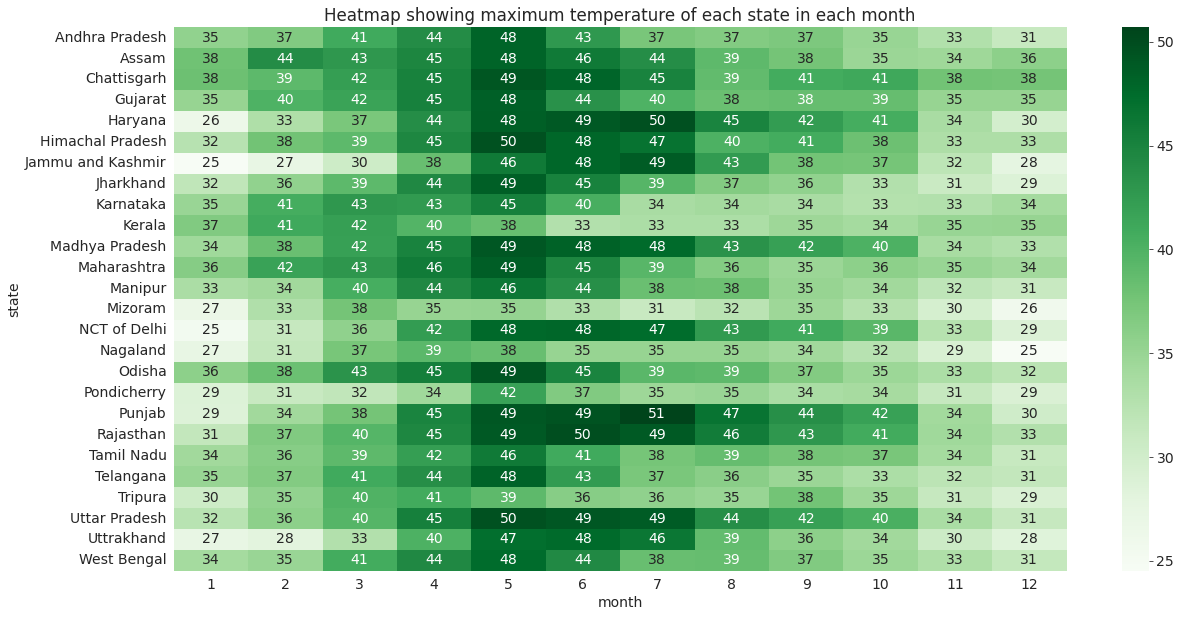

In [223]:
# plot a heatmap using the pivot table
plt.figure(figsize=(20, 10))
plt.title('Heatmap showing maximum temperature of each state in each month')
sns.heatmap(pivot_table1,annot=True, cmap='Greens');

The following are the observations from the above heatmap which shows the maximum temperature of each month: 
* The temperatures recorded in April, May, June, and July are very high. Out of these May month is appearing very bright and is considered the hottest month in most of the states.
* December and January months were recorded the less temperatures and these months are considered as the coldest.
* The highest temperature recorded in Mizoram and Nagaland in the given period are 38 and 39 respectively.
* Kerala temperature has fallen to 38 in May and further fallen to 33 in June and continued to be 33 till August. This decrease in temperature in summer may be due to the Southwest monsoon. The southwest monsoon in India started in Kerala in June.
* The Southwest monsoon in India is from June to September. This effect could be seen in many states from the graph.
* In Pondicherry also the temperature was recorded at 42 in May and the remaining months it was less than 40
* The states which have recorded the highest temperature from the heatmap are Haryana, Himachal Pradesh, Punjab, Rajasthan, Madya Pradesh, and Uttar Pradesh.


We'll obtain maximum temperature of each state by using groupby on state and aggregating the temperature to maximum value.

In [224]:
# to view maximum temperature of each state
max_temp_state=weather_df.groupby(['state'])['temp'].max()
max_temp_state.sort_values(ascending=False).head(10)

state
Punjab               50.71
Rajasthan            49.81
Haryana              49.73
Uttar Pradesh        49.68
Himachal Pradesh     49.63
Odisha               49.32
Chattisgarh          49.18
Madhya Pradesh       49.13
Jammu and Kashmir    48.71
Maharashtra          48.66
Name: temp, dtype: float64

We'll obtain the dictionary from the above maximum temperature series.

In [225]:
# create a dictinary using max_temp_state series
state=[]
for x in range(0,len(max_temp_state)):
  state.append(max_temp_state.index[x])
  max_temp_state_dict={'state':state,
                 'temp':max_temp_state}


We'll obtain the data frame from the above dictionary using `pd.DataFrame`.

In [226]:
# create a dataframe using max_temp_state dictionary
max_temp_state_df=pd.DataFrame(max_temp_state_dict)

Since few states names from weather data are mismatched with the states of json file let us replace these mismatched names.

In [227]:
# replace the mismatched state names
max_temp_state_df.state.replace('Chattisgarh','Chhattisgarh',inplace=True)
max_temp_state_df.state.replace('Uttrakhand','Uttaranchal',inplace=True)
max_temp_state_df.state.replace('NCT of Delhi','Delhi',inplace=True)
max_temp_state_df.state.replace('Odisha','Orissa',inplace=True)
max_temp_state_df.state.replace('Pondicherry','Puducherry',inplace=True)


We'll display the dataframe.

In [228]:
# display the dataframe
max_temp_state_df.sort_values('temp',ascending=False).head(5)

,state,temp
state,,
Punjab,Punjab,50.71
Rajasthan,Rajasthan,49.81
Haryana,Haryana,49.73
Uttar Pradesh,Uttar Pradesh,49.68
Himachal Pradesh,Himachal Pradesh,49.63


In [229]:
# create a Choropleth map
state_geo = 'https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States'

m = folium.Map(location=[21.7679,78.8718], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=max_temp_state_df,
    columns=["state", "temp"],
    key_on="feature.properties.NAME_1",
    fill_color="YlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Maximum Temperature",
).add_to(m)

folium.LayerControl().add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

The above Choropleth map shows the maximum temperature recorded in each state and also indicating the missing states.

In [232]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

#### Distribution of Temperature

We'll see the the distribution of weather temperature using a seaborn distplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



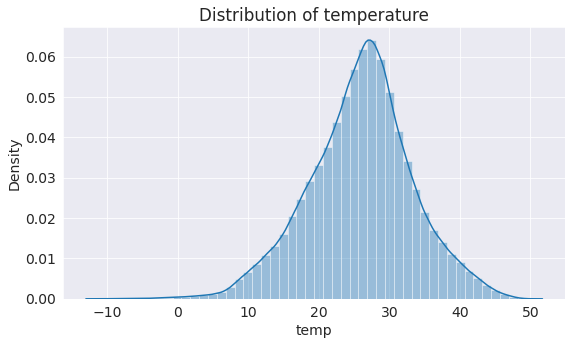

In [233]:
# temperature distribution plot
plt.title("Distribution of temperature")
sns.distplot(weather_df.temp);

The variability in temperatures (weather) can be approximated as a normal (Gaussian) distribution, the so-called 'bell curve'. Most of the observations cluster around the central peak. Extreme values in both tails of the distribution are similarly unlikely.

We can use a box plot to visualize the distribution of monthly weather temperature in India.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



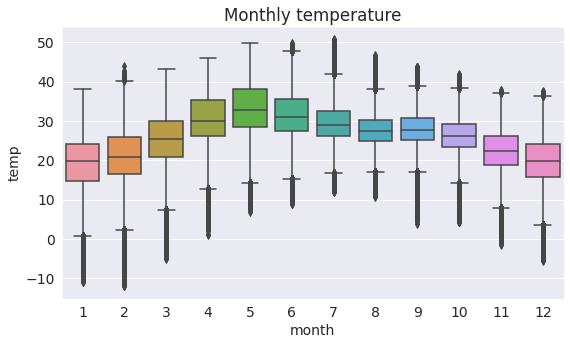

In [234]:
# to view monthly temperature distribution in a box plot
plt.title("Monthly temperature")
sns.boxplot(weather_df.month, weather_df.temp);

The above box plot shows the distribution of temperatures of each month. The size of all the boxes are not equal. The box sizes of July to October are small compared to other months.

In [235]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

### Pressure
Changes in air pressure are also caused by the difference in air temperature above the Earth. Continental landmasses and ocean waters change the temperature of the air above them. These changes create wind and cause pressure systems to develop. The wind moves these pressure systems that change as they pass over mountains, oceans, and other areas.

Years ago the French scientist and philosopher Blaise Pascal, discovered that air pressure decreases with height, and pressure changes at ground level at any one place can be related to daily weather changes. Often, weather forecasters refer to a storm or low-pressure area moving toward your region.

#### Ground-Level Pressure
Let us take the ground level pressure column and look at the maximum ground level pressure recorded in each city.

In [144]:
max_pressure=weather_df.groupby('city_name')['grnd_level'].max().sort_values(ascending=False)
max_pressure.head(10).index

Index(['Gomati', 'South District', 'West District', 'Howrah', 'Puri',
       'Kolkata', 'Kendrapara', 'Porbandar', 'Balasore', 'Jamnagar'],
      dtype='object', name='city_name')

We will plot a bar chart to show the top 10 highest maximum pressure recorded cities. 

Text(0.5, 1.0, 'Top 10 highest maximum Gound level pressure recorded cities')

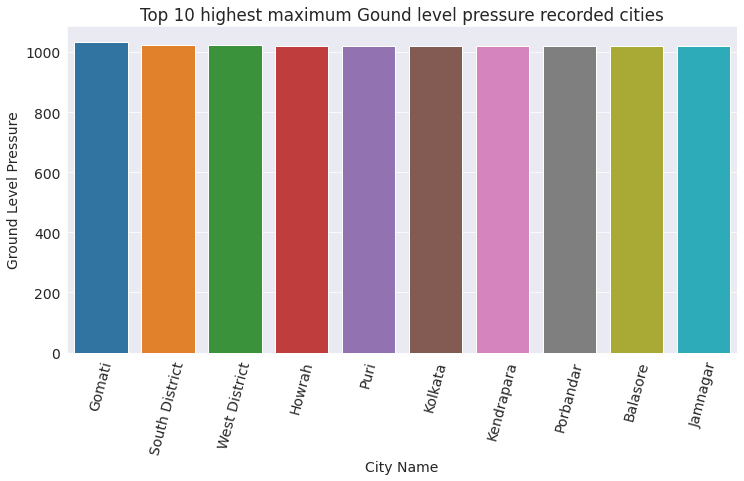

In [242]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(y=max_pressure.head(10),x=max_pressure.head(10).index);
plt.xlabel( "City Name")
  
# Set label for y-axis
plt.ylabel( "Ground Level Pressure" )
  
# Set title for figure
plt.title( "Top 10 highest maximum Gound level pressure recorded cities" )
  


The highest ground level pressure cities are 'Gomati', 'South District', 'West District', 'Howrah', 'Puri', 'Kolkata', 'Kendrapara', 'Porbandar', 'Balasore', and 'Jamnagar'.

We'll look at the minimum ground level pressure recorded in each city.

In [243]:
min_pressure=weather_df.groupby('city_name')['grnd_level'].min().sort_values(ascending=True)
min_pressure.head(10)

city_name
Anantnag      727
Baramulla     745
Kullu         758
Darjeeling    781
Shimla        792
Srinagar      794
Pulwama       794
Wokha         820
Phek          823
Kohima        829
Name: grnd_level, dtype: int64

Text(0.5, 1.0, 'Top 10 lowest minimum Gound level pressure recorded cities')

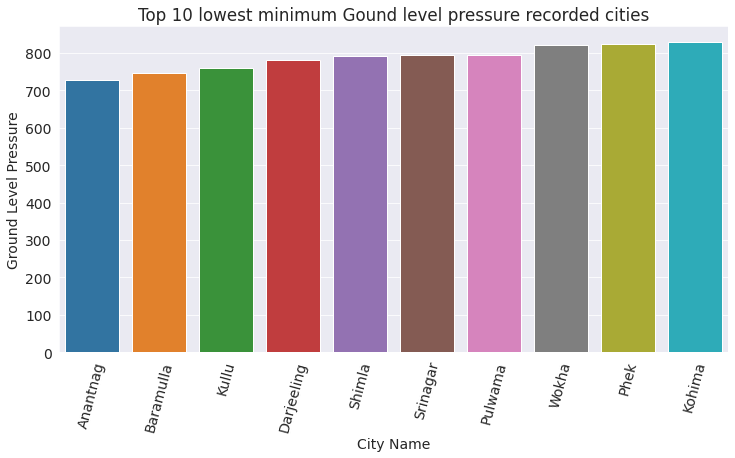

In [244]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(y=min_pressure.head(10),x=min_pressure.head(10).index);
plt.xlabel( "City Name")
  
# Set label for y-axis
plt.ylabel( "Ground Level Pressure" )
  
# Set title for figure
plt.title( "Top 10 lowest minimum Gound level pressure recorded cities" )

The top 10 lowest minimum ground level pressure recorded cities are 'Anantnag', 'Baramulla', 'Kullu', 'Darjeeling', 'Shimla', 'Srinagar',
       'Pulwama', 'Wokha', 'Phek', and 'Kohima'.

### Sea level Pressure
Let us consider the sea level pressure column and analyse.

We'll look into the maximum sea level pressure recorded in each city.

In [148]:
max_pressure_sea=weather_df.groupby('city_name')['pressure'].max().sort_values(ascending=False)
max_pressure_sea.head(10).index

Index(['Cachar', 'Pulwama', 'Srinagar', 'Gomati', 'Kullu', 'Anantnag',
       'Baramulla', 'Chamba', 'Champawat', 'Kangra'],
      dtype='object', name='city_name')

<AxesSubplot:title={'center':'Top 10 highest maximum sea level pressure recorded cities'}, xlabel='city_name', ylabel='pressure'>

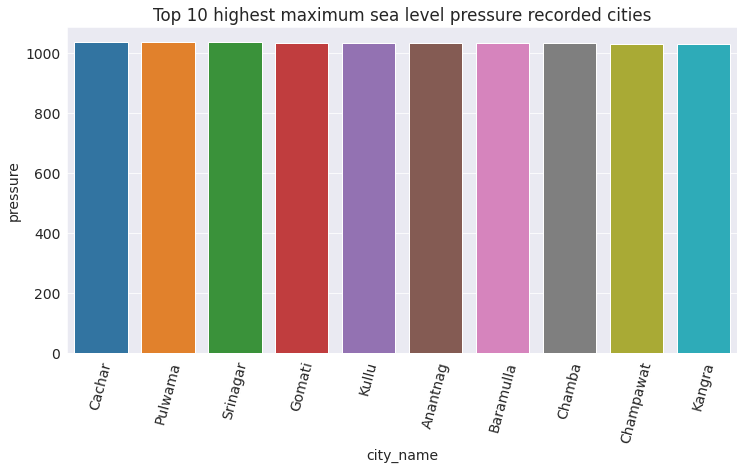

In [246]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.xlabel( "City Name")
plt.ylabel( "Sea Level Pressure" )
plt.title( "Top 10 highest maximum sea level pressure recorded cities" )
  
sns.barplot(y=max_pressure_sea.head(10),x=max_pressure_sea.head(10).index)


The top 10 highest maximum sea level pressure recorded cities are 'Cachar', 'Pulwama', 'Srinagar', 'Gomati', 'Kullu', 'Anantnag',
       'Baramulla', 'Chamba', 'Champawat', and 'Kangra'.

We'll look into the minimum sea level pressure recorded in each city.

In [247]:
min_pressure_sea=weather_df.groupby('city_name')['pressure'].min().sort_values(ascending=True)
min_pressure_sea.head(10).index

Index(['Tumkur', 'Bangalore', 'Kolar', 'Kolkata', 'Howrah', 'Balasore',
       'Jagatsinghpur', 'Kendrapara', 'Rajkot', 'Morbi'],
      dtype='object', name='city_name')

Text(0.5, 1.0, 'Top 10 lowest minimum sea level pressure recorded cities')

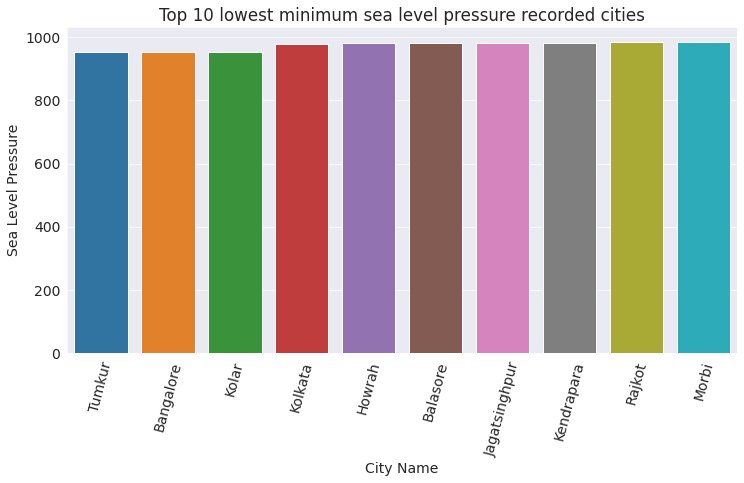

In [248]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(y=min_pressure_sea.head(10),x=min_pressure_sea.head(10).index)
plt.xlabel( "City Name")
  
# Set label for y-axis
plt.ylabel( "Sea Level Pressure" )
  
# Set title for figure
plt.title( "Top 10 lowest minimum sea level pressure recorded cities" )

The top 10 lowest sea level pressure cities are 'Tumkur', 'Bangalore', 'Kolar', 'Kolkata', 'Howrah', 'Balasore',
       'Jagatsinghpur', 'Kendrapara', 'Rajkot', and 'Morbi'.

#### Relation Between Two Measurements
Let us take a sample dataframe which contains 5000 rows to look at the relation between two measurements.

In [249]:
sample_df=weather_df.sample(5000)

First we will look at the relation between ground level pressure and sea level pressure.

In [255]:
fig=px.scatter(sample_df,x='grnd_level',y='pressure', color='month',hover_name="state")
fig.update_layout(
    title="Ground level pressure vs sea level pressure",
    xaxis_title="Ground level Pressure",
    yaxis_title="Sea level Pressure",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The following are the observations from the above scatter plot.
* The ground level pressure and sea level pressures are not related below 1000 hPa. 
* The two pressures are directly related when the ground level pressure is greater than 1000 hPa.

Let us take a sample dataframe and look at the relation between temperature and ground-level pressure.

In [257]:
fig=px.scatter(sample_df,x='temp',y='grnd_level', color='month',hover_name="state")
fig.update_layout(
    title="Temperature vs Ground level pressure",
    xaxis_title="Temperature",
    yaxis_title="Gound Level Pressure",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The above scatter plot shows that there is no relation between temperature and ground level pressure.

In [258]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

### Humidity
The most humid is the tropical wet climate—also known as tropical monsoon climate—that covers a strip of southwestern lowlands abutting the Malabar Coast, the Western Ghats, and southern Assam.

Now we'll extract the maximum humidity recorded in each city and plot the top 10 highest maximum humidity cities.

In [167]:
max_humidity=weather_df.groupby('city_name')['humidity'].max().sort_values(ascending=False)
max_humidity.head(10).index

Index(['Kolkata', 'Pulwama', 'Dharwad', 'Srinagar', 'Howrah', 'Mokokchung',
       'Shimla', 'Buldhana', 'Champawat', 'Longleng'],
      dtype='object', name='city_name')

We will plot a bar chart to show the above cities.

In [168]:
fig=px.bar(y=max_humidity.head(10),x=max_humidity.head(10).index)
fig.update_layout(
    title="Top 10 highest humidity cities in India",
    xaxis_title="City Name",
    yaxis_title="Humidity",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The top 10 highest maximum humiditity recorded cities are 'Kolkata', 'Pulwama', 'Dharwad', 'Srinagar', 'Howrah', 'Mokokchung', 'Shimla', 'Buldhana', Champawat' and 'Longleng'.

Next we'll extract the minimum humidity recorded in each city and plot the top 10 lowest minimum humidity cities.

In [174]:
min_humidity=weather_df.groupby('city_name')['humidity'].min().sort_values(ascending=True)
min_humidity.head(10).index

Index(['Koria', 'Medak', 'Mathura', 'Sangrur', 'Etah', 'Kaithal', 'Bhatinda',
       'Jalore', 'Faridkot', 'Bikaner'],
      dtype='object', name='city_name')

In [263]:
fig=px.bar(y=min_humidity.head(10),x=min_humidity.head(10).index)
fig.update_layout(
    title="Top 10 lowest humidity cities in India",
    xaxis_title="City Name",
    yaxis_title="Humidity",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The top 10 lowest minimum humidity recorded cities are 'Koria', 'Medak', 'Mathura', 'Sangrur', 'Etah', 'Kaithal', 'Bhatinda', 'Jalore', 'Faridkot', and 'Bikaner'.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


### Description
This column describes the main event('Clouds', 'Clear', 'Rain', 'Snow'), climate situation at that particular time. This is a categorical data and can be visualized using 'wordcloud' as shown below. 

The main event from the dataset is shown below.

In [172]:
weather_df.main.unique()

array(['Clouds', 'Clear', 'Rain', 'Snow'], dtype=object)

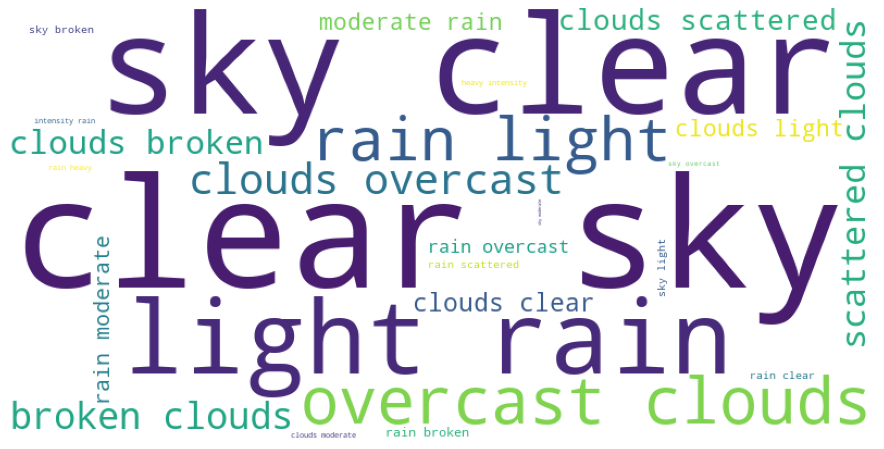

In [ ]:
from wordcloud import WordCloud
words=' '.join((event for event in weather_df.description.dropna() ))
wc=WordCloud(width=800,height=400,background_color='white').generate(words)
plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

The word which appears many times is clear sky. This means that the climate in India is clear most of the times in a year.

In [173]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

### Clouds
This column gives the percentage of cloudiness in each mentioned Indian cities. 

Let us look into the average cloudiness of each state in each month using heatmap. To plot a heat map we need pivot table. We will create a pivot table by extracting average cloudiness of each state in each month as shown below.

In [124]:
#Viewing the mean cloudiness of each state in each month
avg_clouds_month=weather_df.groupby(['state','month'])['clouds'].mean()
avg_clouds_month

state           month
Andhra Pradesh  1        32.900219
                2        26.329205
                3        24.508190
                4        30.973611
                5        47.264919
                           ...    
West Bengal     8        87.051570
                9        85.722036
                10       44.280972
                11       16.641458
                12        8.974496
Name: clouds, Length: 312, dtype: float64

Let us write a code to generate a dataframe from the above series.

In [140]:
# creating a dictionary of lists from  'avg_clouds_month' series
state=[]
month=[]
for x in range(0,len(avg_clouds_month)):
  state.append(avg_clouds_month.index[x][0])
  month.append(avg_clouds_month.index[x][1])
avg_clouds_dict={'state':state,'month':month,'clouds':avg_clouds_month}


We will generate a dataframe using above dictionary of lists.

In [127]:
# generating a dataframe from avg_clouds dictionary
avg_clouds_df=pd.DataFrame(avg_clouds_dict)
avg_clouds_df

state  month     clouds
state          month                                  
Andhra Pradesh 1      Andhra Pradesh      1  32.900219
               2      Andhra Pradesh      2  26.329205
               3      Andhra Pradesh      3  24.508190
               4      Andhra Pradesh      4  30.973611
               5      Andhra Pradesh      5  47.264919
...                              ...    ...        ...
West Bengal    8         West Bengal      8  87.051570
               9         West Bengal      9  85.722036
               10        West Bengal     10  44.280972
               11        West Bengal     11  16.641458
               12        West Bengal     12   8.974496

[312 rows x 3 columns]

Let's form a pivot table using `.pivot` method.

In [128]:
# create a pivot table from the max_temp dataframe
pivot_table2=avg_clouds_df.pivot('state','month','clouds')
pivot_table2

month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
Andhra Pradesh,32.900219,26.329205,24.508190,30.973611,47.264919,85.989306,91.367219,92.005979,76.664432,66.264919,48.331944,30.354973
Assam,25.955826,26.650987,31.987931,44.893750,55.826152,73.842738,89.049890,77.134136,79.958760,43.400749,20.452976,14.530184
Chattisgarh,16.642672,20.551667,31.784871,32.615375,37.231129,69.993292,86.860526,87.614815,69.379587,45.263288,20.280292,13.915847
Gujarat,12.394675,15.819173,24.188233,18.505042,12.555081,54.521667,74.017946,82.383536,60.726379,32.949191,13.134167,18.533992
Haryana,14.152074,18.672459,39.195335,36.389706,25.723529,28.451373,44.587772,59.952859,16.707548,2.614137,12.823824,16.327751
Himachal Pradesh,21.988251,28.861975,48.149617,42.316111,35.553943,40.777870,52.390517,64.699754,30.684658,11.235971,27.635648,26.827688
Jammu and Kashmir,39.492394,38.770502,69.295197,59.151190,47.796774,26.577262,24.272807,30.875292,12.012698,3.460369,46.046190,42.070853
Jharkhand,17.459883,25.792690,34.453879,27.743750,32.594355,71.692083,91.524219,86.442704,76.832772,41.262705,12.767917,9.656452
Karnataka,34.553191,28.659302,29.563831,37.671884,53.535098,85.508406,93.980067,93.916806,85.741835,65.237307,48.608406,33.908871


Let's generate a heatmap form the above pivot table.

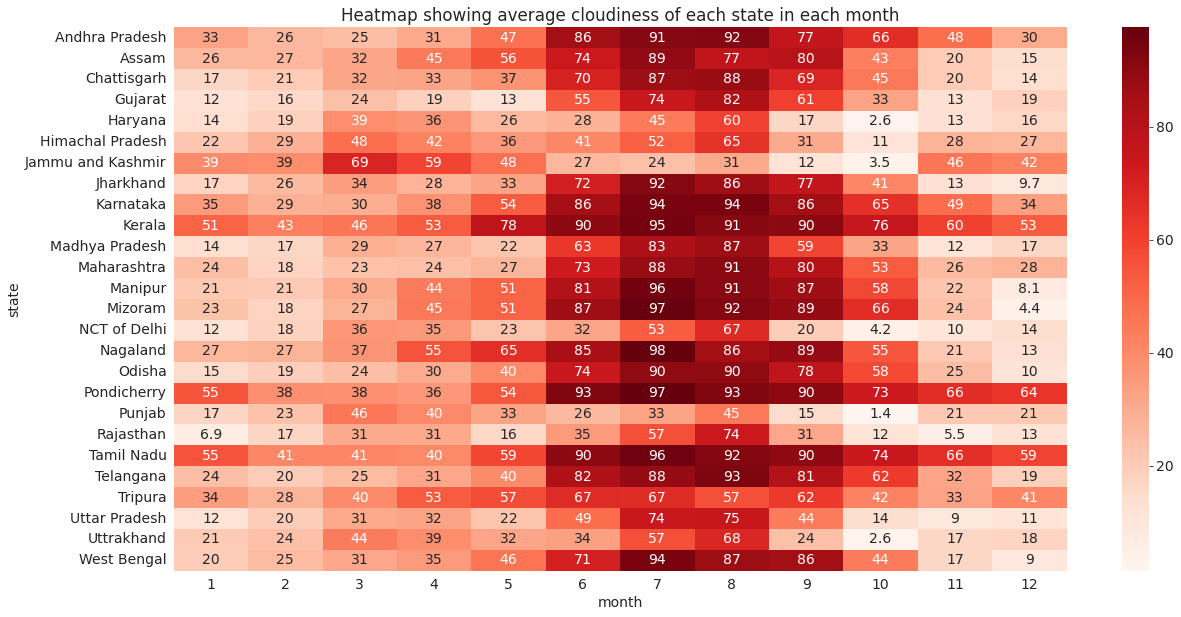

In [129]:
# plot a heatmap using the pivot table
plt.figure(figsize=(20, 10))
plt.title('Heatmap showing average cloudiness of each state in each month')
sns.heatmap(pivot_table2,annot=True, cmap='Reds');

The observations from the above heatmap are shown below:
* The months from **June to september** in most of the states are more cloudy  because of Southwest monsoon (June to September). These cloudy months will have less solar power generation.
* 'Haryana', 'Punjab', 'NCT of Delhi', 'Rajasthan', 'Uttrakhand', 'Uttar Pradesh', 'Himachal Pradesh' and 'Jammu and Kashmir' are less cloudy even in monsoon season also. So these states are more efficient for solar power plants.


In [284]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

### Wind Speed
Total wind power generation in India for the month of July
2020 was extremely low, about 40% lower than in July 2018
or July 2019. This sharp reduction in energy production
happened despite an increase in the installed wind plant
capacity in India of approximately 4,900 MW (3,650 MW)
compared to July 2018/2019 according to Central Electric
Authority data3
. India’s wind power production has always
been significantly and positively impacted by the summer
monsoon, which is basically a large-scale sea breeze that
brings strong winds and heavy precipitation. The months of May to September
make up about two-thirds of the total annual energy
production in India, except in 2020. 

In fact, peak wind energy production is typically reached in
the month of July. Therefore, people are rightly concerned
when both June and July 2020 contribute to the lowest
average wind speed and total wind power generation on
record over the last 25 years or more. The weaker-than-usual monsoon circulation in
2020 can at least partly be explained by a combination of a
warmer-than-normal Indian Ocean and a cooler-than-normal
India subcontinent.

Despite the disappointing wind energy production in June
and July of this year, the total wind energy production in
India is down by approximately 4% and 6% so far compared
to the same period in 2018 and 2019, respectively. This
is partly due to the above-average production in March,
April and August 2020 as well as an increase in wind power
capacity of approximately 5,275 MW between Jan. 1, 2018,
and Sept. 30, 2020.

The wind power generation in India is mainly concentrated in seven states: Tamil Nadu,
Gujarat, Maharashtra, Karnataka, Rajasthan, Andhra Pradesh and Madhya Pradesh.

Let us look at the avaerage wind speed of each month.

In [274]:
#view the months with their average wind speed
avg_windspeed=weather_df.groupby('month')['wind_speed'].mean()
avg_windspeed.sort_values(ascending=False)

month
6     4.133656
8     4.033466
5     3.980412
7     3.816438
4     3.232505
3     3.046873
9     2.773924
2     2.627106
1     2.453522
11    2.362695
12    2.346202
10    2.282945
Name: wind_speed, dtype: float64

In [280]:
#plot the months with thier average wind speed
fig=px.bar(y=avg_windspeed,x=avg_windspeed.index)
fig.update_layout(
    title="Months with their average wind speed",
    xaxis_title="Month",
    yaxis_title="Average Wind Speed",
        font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The following are the observations from the above bar chart:
* The months from May to August has recorded highest average wind speed compared to other months. 
* Since the wind power generation is directly related to the wind speed we can say that the months from May to August generates more wind power compared to other months because of heavy monsoon wind speeds.



### Wind degree
Let us take the wind_degree column and analyse what it represents.

In [186]:
weather_df.wind_degree.unique()

array([312, 297, 234, 246,  65,  14, 162, 285, 357,  37, 229, 249, 238,
       342, 219, 211, 182, 200, 240, 223, 107, 192, 147, 325, 286, 274,
       292, 280, 270, 302, 295, 281, 287,  28,  57,  29,  75,  86, 137,
       230, 243, 231, 235, 250, 256, 263, 334, 104,   7,  51,  79, 349,
        11,  25,  67,  47,  53,  83,  54,  17,  18,  52,  93,   8, 350,
       332,  24,  77, 100, 113, 138, 236, 251, 266, 275, 277, 237, 260,
       255, 242, 335,  16, 345,  21,  23,  34,  61,  68,  45,  39,  64,
        87,  10,  41,  62,  44,  73, 161, 169, 171,  22, 348, 351, 347,
       159, 177,   4, 133, 343, 352, 164, 166, 346, 354, 185,   2, 222,
       148, 103,  59,  43,  72,  74, 112, 120,  33,  78, 233, 210, 216,
         9, 360,  19,  15, 301, 215,  48, 355,  27, 321,  76,  91,  80,
        99, 106, 119, 115, 124, 116,  55,  71, 273, 317, 291, 338, 316,
       310, 318, 314, 294, 299, 320, 289, 311, 279, 268, 304, 183, 218,
       220, 156, 150, 308, 253, 262, 244, 337, 319, 296, 330,   

Wind direction is generally reported by the direction from which it originates. The values inside the wind degree column are in the range of 0 to 360 and it is measured in degrees.
The below picture shows the direction from where the wind is coming for each given value.
![Wind direction](https://i.imgur.com/RDwI0ao.jpg)

In [292]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

## Asking and Answering Questions
We've already gained several insights about the weather data by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.
1. What are the hottest cities and states in India?
2. What are the coldest cities in India?
3. How temperature and pressure are related?
4. What is the relation between temperature and humidity?
5. What are the highest average wind speed cities in India?
6. Which states are more efficient for wind power installations?
7. Which month is hottest in India?
8. Which month is coldest in India?
9. Which states are more efficient for solar power plants?

### Q1. What are the top 10 hottest cities and hottest states in India in 2020?

To answer this question, we have to look into temperature column.

We'll take the maximum temperature of each city and sort in a decending order to get the hottest cities.

In [ ]:
avg_temp=weather_df.groupby('city_name')['temp'].max().sort_values(ascending=False)
avg_temp.head(10).index

Index(['kapurthala', 'Amritsar', 'Moga', 'Ludhiana', 'Jalandhar', 'Faridkot',
       'Nawanshahr', 'Fazilka', 'Muktsar', 'Barnala'],
      dtype='object', name='city_name')

The dataset has given the following cities as the top 10 hottest cities in India:

 'kapurthala', 'Amritsar', 'Moga', 'Ludhiana', 'Jalandhar', 'Faridkot',
       'Nawanshahr', 'Fazilka', 'Muktsar', 'Barnala'.

We'll visualize these cities on a barplot.

In [ ]:
fig=px.bar(y=avg_temp.head(10),x=avg_temp.head(10).index)
fig.update_layout(
    title="Top 10 hottest cities in India",
    xaxis_title="City Name",
    yaxis_title="Temperature",
    #legend_title="",
    plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)


Let us extract the hottest states in India.

In [ ]:
avg_temp_month=weather_df.groupby(['state'])['temp'].max().sort_values(ascending=False)
avg_temp_month.head(10)

state
Punjab               50.71
Rajasthan            49.81
Haryana              49.73
Uttar Pradesh        49.68
Himachal Pradesh     49.63
Odisha               49.32
Chattisgarh          49.18
Madhya Pradesh       49.13
Jammu and Kashmir    48.71
Maharashtra          48.66
Name: temp, dtype: float64

We'll plot the states using a barplot.

In [ ]:
fig=px.bar(x=avg_temp_month.head(10),y=avg_temp_month.head(10).index)
fig.update_layout(
    title="Top 10 hottest states in India",
    xaxis_title="Average Temperature",
    yaxis_title="State",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0f"
    )
)

The top 10 hottest states as per the considered dataset are as follows:

'Punjab', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Himachal Pradesh',
       'Odisha', 'Chattisgarh', 'Madhya Pradesh', 'Jammu and Kashmir',
       'Maharashtra'.

The actual hottest cities and states recorded in 2020 are shown below:
![](https://i.imgur.com/fkTueyW.png). 

The states which we got and the actual states are not matching. So the dataset need to be corrected.

### Q2 What are the top 10 coldest cities in India?
We will extract minimum temperature of each city from 'temp' column and sort it in an ascending order to get the coldest cities.

In [ ]:
avg_temp_cold=weather_df.groupby('city_name')['temp'].min().sort_values(ascending=True)
avg_temp_cold.head(10).index

Index(['Anantnag', 'Baramulla', 'Srinagar', 'Pulwama', 'Kullu', 'Gomati',
       'Cachar', 'Shimla', 'Champawat', 'Phek'],
      dtype='object', name='city_name')

In [ ]:
fig=px.bar(y=avg_temp_cold.head(10),x=avg_temp_cold.head(10).index)
fig.update_layout(
    title="Top 10 Coldest cities in India",
    xaxis_title="City Name",
    yaxis_title="Average Temperature",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0f"
    )
)

The top 10 coldes cities in India are Anantnag', 'Pulwama', 'Baramulla', 'Srinagar', 'Darjeeling', 'Shimla',
       'Wokha', 'Phek', 'Champawat', 'Kohima'

### Q3. How temperature and pressure are related?
We will take a sample dataframe of 5000 rows from the original data and plot a scatter plot to see the relation between temperature and sea-level pressure.

In [291]:
fig=px.scatter(sample_df,x='temp',y='pressure',color='month',hover_name='state')
fig.update_layout(
    title="Temperature vs Sea-level pressure",
    xaxis_title="Temperature",
    yaxis_title="Sea-level Pressure",
    legend_title="Month",
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The observations from the above scatter plot are as follows:
* The temperature and pressure are inversely proportional. This means that the increase in temperature decreases the pressure and vice versa.
* The color shows the months and by looking at the color we can say that the winter season is having high pressure which is above 1009 hPa and the months from March to October are having the pressure below 1009 hPa.

### Q4. What is the relation between temperature and humidity?

Let us look at the relation between temperature and humidity from the sample dataset.

In [288]:
fig=px.scatter(sample_df, x='temp',y='humidity',color='month',hover_name='state')
fig.update_layout(
    title="Temperature vs Humidity",
    xaxis_title="Temperature",
    yaxis_title="Humidity",
    legend_title="Month",
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The observations from the above scatter plot are as follows:
* The relation between temperature and humidity is also inversely proportional. 
* Here the inverse relation is somewhat different than the inverse relation between temperature and pressure. 
* Each humidity point is having certain range of temperatures and each humidity value contains almost all the months.


### Q5.What are the top 10 highest average wind speed cities in India? 
To answer this question, we have to consider wind_speed column and analze.

In [ ]:
max_windspeed=weather_df.groupby('city_name')['wind_speed'].mean().sort_values(ascending=False)
max_windspeed.head(10)

city_name
Porbandar         5.605212
Ramanathapuram    5.596012
Jamnagar          5.572209
Puri              5.250414
Gadag             5.068677
Nagapattinam      5.060932
Chitradurga       5.056051
Jaisalmer         5.052222
Bijapur           5.033896
Karaikal          5.005478
Name: wind_speed, dtype: float64

We got the top 10 highest average wind speed cities in India as shown above.

In [ ]:
fig=px.bar(y=max_windspeed.head(10),x=max_windspeed.head(10).index)
fig.update_layout(
    title="Top 10 highest average wind speed cities in India",
    xaxis_title="City Name",
    yaxis_title="Wind Speed",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The top 10 highest average wind speed cities in India are 'Porbandar', 'Ramanathapuram', 'Jamnagar', 'Puri', 'Gadag',
       'Nagapattinam', 'Chitradurga', 'Jaisalmer', 'Bijapur', 'Karaikal'.

### Q6. Which states are more efficient for wind power installations?
Wind speed largely determines the amount of electricity generated by a turbine. Higher wind speeds generate more power because stronger winds allow the blades to rotate faster. Faster rotation translates to more mechanical power and more electrical power from the generator. The relationship between wind speed and power for a typical wind turbine is shown in Figure 2.
![](https://i.imgur.com/C70cMMg.jpg)



Since wind speed is essential component for wind power generation we have to consider wind_speed column to answer this question. Here we are taking the average wind speed of each state and sorting it out.

In [ ]:
avg_windspeed_state=weather_df.groupby('state')['wind_speed'].mean().sort_values(ascending=False)


In [ ]:
state=[]
for x in range(0,len(avg_windspeed_state)):
  state.append(avg_windspeed_state.index[x])
  avg_windspeed_state_dict={'state':state,
                 'wind_speed':avg_windspeed_state}
avg_windspeed_state_df=pd.DataFrame(avg_windspeed_state_dict)

In [ ]:
avg_windspeed_state_df.state.replace('Chattisgarh','Chhattisgarh',inplace=True)
avg_windspeed_state_df.state.replace('Uttrakhand','Uttaranchal',inplace=True)
avg_windspeed_state_df.state.replace('NCT of Delhi','Delhi',inplace=True)
avg_windspeed_state_df.state.replace('Odisha','Orissa',inplace=True)
avg_windspeed_state_df.state.replace('Pondicherry','Puducherry',inplace=True)

In [137]:
state_geo = 'https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States'

m = folium.Map(location=[21.7679,78.8718], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=avg_windspeed_state_df,
    columns=["state", "wind_speed"],
    key_on="feature.properties.NAME_1",
    fill_color="YlGnBu",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Average Wind Speed",
).add_to(m)

folium.LayerControl().add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

From the above graph we can identify that the highest average wind speed states are 'Pondicherry', 'Gujarat', 'Karnataka', 'Rajasthan', 'Andhra Pradesh',
       'Maharashtra', 'Tamil Nadu', 'Telangana', 'Madhya Pradesh'. These states are more preferable for wind turbine installations because these are experiencing highest avaerage wind speed.

### Q7. Which month in India is hottest?
Let us look into the average temperature of each month and take the month which has maximum average temperature as hottest.

In [ ]:
avg_temp1=weather_df.groupby('month')['temp'].mean().sort_values(ascending=False)
avg_temp1

month
5     32.965249
6     31.412974
4     30.233029
7     29.407877
9     27.948546
8     27.683011
10    26.230226
3     25.179025
11    22.317082
2     21.040913
12    19.620190
1     19.426285
Name: temp, dtype: float64

The above results shows that May month is having highest average temperature compared to other months. So May is treated as hottest month in India.

### Q8. Which month is coldest in India?
To answer this question we will take average temperature of each month and consider the month which has least avearge temperature as coldest.

In [ ]:
avg_temp2=weather_df.groupby('month')['temp'].mean().sort_values(ascending=True)
avg_temp2

month
1     19.426285
12    19.620190
2     21.040913
11    22.317082
3     25.179025
10    26.230226
8     27.683011
9     27.948546
7     29.407877
4     30.233029
6     31.412974
5     32.965249
Name: temp, dtype: float64

The above results shows that both January and December months are having almost equal and least average temperatures among other months. So these two months are consedered as coldest in India. 

### Q9. Which states are more efficient for solar power plants?
The key factor affecting the PV system's performance is the solar radiation data. Since we don't have this data in the selected dataset let us take clouds column which indirectly tells about the climate condition. If the climate is clear means there is full solar radiation and if it is cloudy then there is less solar radiation.

We will take average cloudiness of each state and answer this question.

In [ ]:
# extract the states which has lowest avearge cloudiness
avg_cloud_state=weather_df.groupby('state')['clouds'].mean().sort_values(ascending=True)
avg_cloud_state.head(10)

state
Haryana              25.981622
Punjab               26.505334
NCT of Delhi         26.828207
Rajasthan            26.992468
Uttrakhand           31.368471
Uttar Pradesh        32.382772
Gujarat              34.325076
Himachal Pradesh     35.573130
Jammu and Kashmir    36.538705
Madhya Pradesh       37.811092
Name: clouds, dtype: float64

Let us plot these less cloudy states on a bar graph.

In [ ]:
#plot less cloudy states on a bar graph
fig=px.bar(y=avg_cloud_state.head(10),x=avg_cloud_state.head(10).index)
fig.update_layout(
    title="Top 10 lowest cloudiness states in India",
    xaxis_title="States",
    yaxis_title="Percentage of cloudiness",
    #legend_title="",
    #plot_bgcolor='#ffcc9c',
    font=dict(
        family="Arial",
        size=14,
        color="#cc3e0e"
    )
)
fig

The following states are more efficient to install solar power plants because these states are having clear sky most of the time compared to other states.

'Haryana', 'Punjab', 'NCT of Delhi', 'Rajasthan', 'Uttrakhand',
       'Uttar Pradesh', 'Gujarat', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Madhya Pradesh'.



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'

## Summary
The Exploratory Data Analysis on India's Weather dataset is completed.
Here are the outline's that we have followed:
1. Downloaded the dataset from Kaggle
2. Data preparation and cleaning was done with Pandas
3. Exploratory analysis and visualization was done along with asking and answering interesting questions.

The following are the observations I have noticed during Exploratory Analysis:

1. 'Punjab', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Himachal Pradesh', 'Odisha', 'Chattisgarh', 'Madhya Pradesh', 'Jammu and Kashmir' and 'Maharashtra' are the top 10 hottest states in India.
2. The top 10 coldest cities in India are 'Anantnag', 'Pulwama', 'Baramulla', 'Srinagar', 'Darjeeling', 'Shimla', 'Wokha', 'Phek', 'Champawat', and 'Kohima'.
3. May is the hottest month of the year.
4. December and January are the coldest months, with the lowest temperatures occurring in the Indian Himalayas.
5. The temperature and pressure are inversely proportional.
6. The relation between temperature and humidity is inverse and the humidity value is not particular to one season. A particular humidity value contains almost all the months.
7. The climate in India in 2020 is mostly clear sky.
8. The wind power generation is mainly depends on the wind speed. The most preferable and efficient states for wind power installation are noticed as 'Pondicherry', 'Karnataka', 'Gujarat', 'Rajasthan'.
9. 'Haryana', 'Punjab', 'NCT of Delhi', 'Rajasthan', 'Uttrakhand', 'Uttar Pradesh', 'Gujarat', 'Himachal Pradesh', 'Jammu and Kashmir', 'Madhya Pradesh' are the most preferable states for solar power plants because these states are less cloudy compared to other states.


## Conclusion
Solar power generation is more in summer & winter and less in rainy/monsoon season. This is because the summer and winter seasons provide sufficient solar irradiation with clear sky and monsoon season is covered with clouds. The months from December to May gives high solar generation and June to November gives less solar generation. The months from June to November gives high wind power generation compared to other months because of heavy monsoon winds.

## Future Work
* We can analyze the missing cities in each state.
* The most preferred states/cities for solar power installations can be exactly identified by joining the solar irradiation and rainfall columns.
* The most preferred states/cities for hydel power plants can be identified by joining the rainfall column.
* We can go deeply into each column and bring out many more interesting insights with regard to Renewable power generation.

## References
* [Lesson 3.2 in Zero to Data Science Bootcamp by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/3-2-analyzing-tabular-data-with-pandas)
* [Lesson 4.1 in Zero to Data Science Bootcamp by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/visualization-with-matplotlib-and-seaborn)
* [Lesson 3.3 in Zero to Data Science Bootcamp by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/advanced-data-analysis-techniques)
* [Lesson 4.2 in Zero to Data Science Bootcamp by Jovian](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/interactive-visualization-with-plotly-and-folium)
* [User guide for Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
* [List of properties you can set using update_layout](https://plotly.com/python/reference/layout/)
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [Matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html)
* [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial)
* [opendatasets Python library](https://github.com/JovianML/opendatasets)
* [Folium Tutorial](https://python-visualization.github.io/folium/)
* [Plotly documentation](https://plotly.com/python/)
* [India's weather data](https://www.kaggle.com/syedjaferk/indias-weather-data)
* https://aeronsystems.com/why-do-solar-power-plants-need-weather-monitoring-station-wms/#:~:text=A%20weather%20monitoring%20station%20can,to%20increase%20the%20plant%20output.

In [294]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/prasanthi-vvit/final-eda-project


'https://jovian.ai/prasanthi-vvit/final-eda-project'